<a href="https://colab.research.google.com/github/KushalranaAI/Machine-learning-/blob/main/module_4_data_collection_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Where to collect data for machine learning?

Question need to be answer or understnad:
1. Importance of Data in Machine Learning?
- Ans: Data is crucial in machine learning as it is the input used to train algorithms and make predictions. The quality and quantity of data can greatly affect the accuracy and performance of a model. Good data should be representative, diverse, and labeled, and should avoid bias to ensure the model can generalize to new examples. The more data a model is trained on, the better it will be able to learn patterns and make predictions, but too much data can also lead to overfitting. Therefore, finding the right balance of data quality and quantity is important in machine learning.
2. Where to collect the data?
- kaggle
- UCI machine learning repository
- Google dataset search

3. Demonstration of data collection.

Importing dataset using kaggle API


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle1

In [ ]:
! cp kaggle.json ~/.kaggle1/
import json
token = {"username":"kushalrana","key":"c16b1a373464c70b5382e43e1c729e77"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
! chmod 600 ~/.kaggle1/kaggle.json

In [ ]:
!kaggle competitions download -c LANL-Earthquake-Prediction

100% 2.27G/2.27G [00:19<00:00, 133MB/s]
100% 2.27G/2.27G [00:19<00:00, 128MB/s]


In [ ]:
# extract a compressed file
from zipfile import ZipFile
dataset = '/content/LANL-Earthquake-Prediction.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is Extracted')

The dataset is Extracted


In [ ]:
import pandas as pd
dataset1=pd.read_csv('/content/train.csv')
dataset1.head()

### Handling the missing value

Handling missing values in a dataset is a common challenge in data pre-processing and there are several methods to deal with it. Some of the most common methods include:

1. Deletion: This involves removing the entire row or column with missing values. This method is appropriate when the missing values are only a small portion of the dataset, and if the missing values are not randomly distributed.

2. Imputation: This involves replacing missing values with substitute values. There are several imputation methods, such as:

- Mean/Median/Mode Imputation: This method replaces missing values with the mean, median, or mode of the non-missing values in the same column.
- Regression Imputation: This method uses regression analysis to predict missing values based on the values of other variables in the dataset.
- Multiple Imputation: This method uses statistical models to create several imputed datasets, each with different missing values filled in, and then combines the results to provide a final estimate.
3. Interpolation: This involves estimating missing values based on the values of other observations in the dataset.

4. Extrapolation: This involves estimating missing values based on values outside the range of the observed data.

5. Data Wrangling: This involves using other available sources of data or knowledge to infer missing values.

The appropriate method depends on the amount of missing data, the reason for the missing values, and the structure of the dataset. It's important to choose a method that preserves the underlying relationships in the data and doesn't introduce any significant biases.





In [ ]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset 
dataset = pd.read_csv('/content/Placement_Dataset.csv')

In [ ]:
# to see the first five rows of dataset
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
dataset.shape

(215, 15)

In [ ]:
# checking the missing values in a dataset
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### Central Tendencies
Central tendencies refer to a summary measure that gives us an idea of where the majority of the data in a dataset lies. There are three common measures of central tendency: mean, median, and mode.

- Mean: The mean is the average of a set of numbers and is calculated by summing all the values and dividing by the total number of values. The mean is sensitive to outliers and extreme values, so it may not always give a representative picture of the data.

- Median: The median is the middle value of a set of numbers when the data is ordered from smallest to largest. If there are an odd number of observations, the median is the middle value. If there are an even number of observations, the median is the average of the two middle values. The median is a robust statistic, meaning that it is not affected by outliers or extreme values.

- Mode: The mode is the most frequently occurring value in a dataset. A dataset can have one mode, multiple modes, or no mode at all. The mode is a useful measure of central tendency for nominal or ordinal data, but it is not useful for continuous or interval data.

It's important to choose the appropriate measure of central tendency depending on the type of data and the goals of the analysis. For example, if the data has a skewed distribution, the median may be a more appropriate measure of central tendency than the mean.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


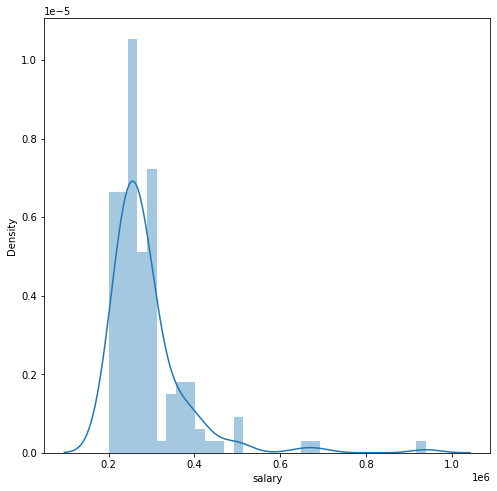

In [ ]:
# analyze a distribution of data in a salary column
fig, ax = plt.subplots(figsize =(8,8))
sns.distplot(dataset.salary)


In [ ]:
# using imputation to handle a missing value
# Replace the missing value with MEdium value

dataset['salary'].fillna(dataset['salary'].median(), inplace =True)

In [ ]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
## droping method
salary_dataset = pd.read_csv('/content/Placement_Dataset.csv')

In [ ]:
## drop the missng value
salary_dataset = salary_dataset.dropna(how = 'any')

In [ ]:
salary_dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
salary_dataset.shape

(148, 15)

# Data standardization
Data standardization is a process of transforming the values in a dataset to have a common scale. This is useful when comparing values that have different units or scales, or when working with algorithms that are sensitive to the scale of the input data.

There are two common methods of standardizing data:

- Min-Max Scaling: This method transforms the data to a scale between 0 and 1 by subtracting the minimum value from each data point and dividing by the range (maximum value minus minimum value).

- Standardization: This method transforms the data to have a mean of 0 and a standard deviation of 1. The standardization is done by subtracting the mean from each data point and dividing by the standard deviation.

Standardizing data can improve the performance of some machine learning algorithms and is often a required pre-processing step for many data analysis tasks. However, it's important to note that standardization can have an impact on the interpretation of the data and its relationship to other variables, so it's important to choose the appropriate method and carefully consider the implications of the transformation.

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# loading the datasets
dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# loading the data to a pandas dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 30)

In [ ]:
X = df
Y = dataset.target

In [ ]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

Splitting the data into training data and test data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape,X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the data

In [ ]:
print(dataset.data.std())

228.29740508276657


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_standardized = scaler.transform(X_train)

In [ ]:
print(X_train_standardized)

[[ 1.40381088  1.79283426  1.37960065 ...  1.044121    0.52295995
   0.64990763]
 [ 1.16565505 -0.14461158  1.07121375 ...  0.5940779   0.44153782
  -0.85281516]
 [-0.0307278  -0.77271123 -0.09822185 ... -0.64047556 -0.31161687
  -0.69292805]
 ...
 [ 1.06478904  0.20084323  0.89267396 ...  0.01694621  3.06583565
  -1.29952679]
 [ 1.51308238  2.3170559   1.67987211 ...  1.14728703 -0.16599653
   0.82816016]
 [-0.73678981 -1.02636686 -0.74380549 ... -0.31826862 -0.40713129
  -0.38233653]]


In [ ]:
X_test_standardized = scaler.transform(X_test)

In [ ]:
print(X_train_standardized.std())

1.0


In [ ]:
print(X_test_standardized.std())

0.8654541077212674


# Label Encoding
Label Encoding is a method of transforming categorical variables into numerical values. This is done by assigning a unique numerical value to each category in a categorical variable. The transformed variables can then be used as input to machine learning algorithms, which typically require numerical input data.

For example, suppose we have a categorical variable "color" with three categories: red, green, and blue. Label encoding would transform these categories into numerical values, such as red=1, green=2, blue=3.

Label encoding is a simple method, but it has some drawbacks. For example, it can introduce an arbitrary ordering of the categories that may not reflect any underlying relationship. Additionally, algorithms such as linear regression can assign different weights to the encoded categories, which can lead to biased results.

To overcome these limitations, another encoding method called One-Hot Encoding is often used, which creates a separate binary column for each category and assigns a value of 1 or 0 to indicate the presence or absence of that category in a particular row. This method does not introduce any arbitrary ordering of the categories and is often used with algorithms that can handle sparse data, such as decision trees and neural networks.

In [ ]:
 # importing the dependencies
 import pandas as pd
 from sklearn.preprocessing import LabelEncoder

Label encoding of bread cancer dataset

In [ ]:
# loading a data from csv file to pandas dataframe
cancer_data = pd.read_csv('/content/breast_cancer_data.csv')

In [ ]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer_data.shape

(569, 33)

In [ ]:
# finding the count of different labels
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# load the label encoder function
label_encode = LabelEncoder()

In [ ]:
labels = label_encode.fit_transform(cancer_data.diagnosis)

In [ ]:
## apending the label to the dataframe
cancer_data['target']= labels

In [ ]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [ ]:
cancer_data['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

Endcoing the iris data set

In [ ]:
iris_data = pd.read_csv('/content/iris_data.csv')

In [ ]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# loadint the label encoder
label_encoder_1= LabelEncoder()

In [ ]:
iris_labels = label_encoder_1.fit_transform(iris_data.Species )

In [ ]:
iris_data['target']= iris_labels

In [ ]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
iris_data['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# Train Test split in Machine learning
Splitting a dataset into a training set and a testing set is a common practice in machine learning. The main reason is to evaluate the performance of a model. The training set is used to train the model, while the testing set is used to evaluate the model's performance on unseen data.

By evaluating the model on a separate dataset, we can get a more accurate measure of its generalization ability. If we evaluate the model on the same data that was used to train it, then we run the risk of overfitting, which occurs when a model becomes too specialized to the training data and cannot generalize well to new, unseen data.

Additionally, splitting the dataset into training and testing sets helps us determine if the model is underfitting or overfitting the data. If the model is underfitting, it means that the model is too simple and cannot capture the underlying patterns in the data. If the model is overfitting, it means that the model is too complex and is modeling the noise in the data rather than the underlying patterns.

In conclusion, splitting the dataset into training and testing sets is an essential step in the machine learning process as it allows us to evaluate the performance of the model and avoid overfitting.

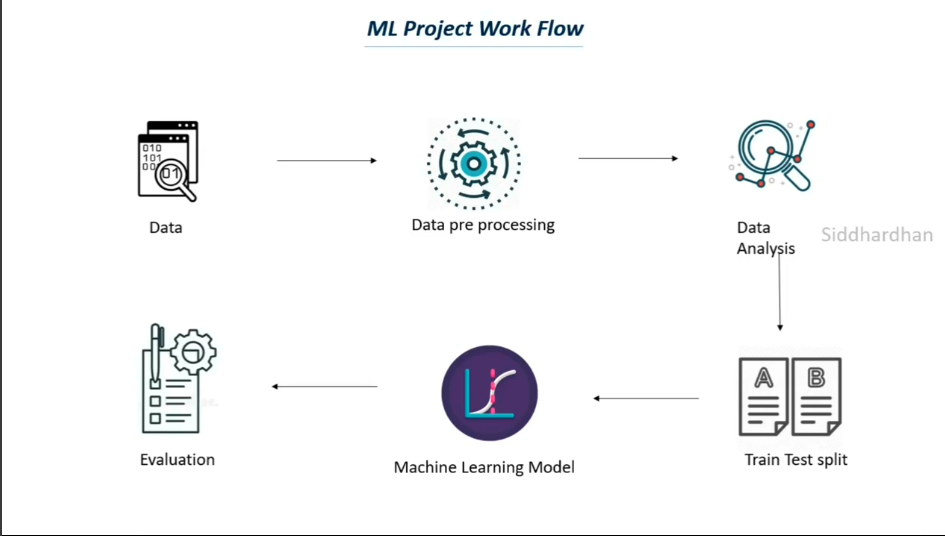

Importing the dependemcies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


Data collection and analysis
PIMA Diabetes dataset

In [ ]:
# loading the diabetes dataset to a pandas dataframe
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# getting the statistical measures of data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 -> not diabetic


1 -> diabetic







In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardized

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
Standardized_data = scaler.transform(X)

In [ ]:
print(Standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = Standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Spliting the data into training data and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape,X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Handling the imbalanced dataset

### Imbalance
A dataset with an unequal class distribution

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
credit_card_data = pd.read_csv('/content/credit_data.csv')

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.shape

(15936, 31)

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# determine the distribution for two classes
credit_card_data['Class'].value_counts()

0.0    15862
1.0       73
Name: Class, dtype: int64

This is highly imbalance Dataset

0--> legit transition

1--> fraudulent transaction

In [ ]:
# separating the legit and fraudulent transaction
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(15862, 31)
(73, 31)


### Under-sampling
Under-sampling is a technique used to balance an imbalanced dataset. It is a method where the majority class samples are reduced to make the number of samples in the majority class and minority class equal. In an imbalanced dataset, the majority class usually has a much larger number of samples compared to the minority class, and this can create problems in machine learning algorithms, as they may be biased towards the majority class.

**Under-sampling works by randomly selecting a subset of the majority class samples** to reduce its size so that it matches the size of the minority class. This way, the resulting dataset is balanced, and the machine learning algorithm can learn from a more representative sample of both classes. However, the **disadvantage of under-sampling** is that valuable information from the majority class may be lost when reducing the size of its samples.

Building a sample dataset containing simillar distribution of legit & fraudulent trnasactional

In [ ]:
legit_sample = legit.sample(n=75)

In [ ]:
print(legit_sample.shape)

(75, 31)


Concantenate the two dataframe

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9876,14556,0.631799,-0.823947,1.223744,2.035845,-0.982106,0.893219,-0.532392,0.349031,2.413296,...,-0.390884,-0.956180,-0.056847,0.136792,0.231415,-0.595626,0.015182,0.047028,213.91,0.0
3349,2899,1.167954,0.125881,0.879225,0.786664,-0.869120,-1.111867,-0.079887,-0.243691,0.073567,...,0.201747,0.641861,-0.059488,1.002315,0.426409,0.449189,-0.014699,0.027996,26.00,0.0
2652,2187,-0.879468,1.010551,1.392045,-1.285551,-0.350980,-0.846060,0.436285,0.101183,0.475171,...,-0.119343,-0.137874,0.066295,0.430079,-0.271870,0.741732,0.402253,0.191646,3.84,0.0
12987,22814,1.176016,-0.057574,0.277868,0.103664,-0.140781,0.081321,-0.376681,0.169831,1.391336,...,-0.090583,-0.032177,0.047935,-0.308744,0.129750,1.047897,-0.099122,-0.027934,2.50,0.0
2230,1757,-0.969733,0.865992,-0.349486,2.944240,0.387280,0.162082,0.771453,0.274922,-1.523198,...,0.167151,0.525416,-0.065168,-0.413519,-1.048478,0.149283,0.432932,0.008957,151.67,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15566,26961,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,-3.845567,...,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,99.99,1.0
15736,27163,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,99.99,1.0
15751,27187,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,...,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,99.99,1.0
15781,27219,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1.0
15810,27252,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,...,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,99.99,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    75
1.0    73
Name: Class, dtype: int64

# Feature Extraction of text data: Tf-idf Vectorizer
- **Feature extraction** is a process in machine learning and data analysis where relevant information is extracted from raw data and transformed into a set of features that can be easily understood and used by machine learning algorithms. These features are a condensed representation of the original data, and they are designed to capture the important information and relationships in the data that are relevant for the task at hand.
- *The goal of feature extraction is to reduce the amount of data that needs to be processed*, simplify the data, and improve the performance of machine learning algorithms by reducing overfitting, noise, and irrelevant information. By extracting meaningful features, machine learning algorithms can make predictions or decisions more accurately and efficiently.

***The mapping from textual data to real valued vectors is called feature extraction***

- **Bag Of Word(BOW)**: List of unique words in the text corpus
- **Term Frequency-Inverse DOcument Frequency(TF-IDF)**: To count the number of times each word appears in a document


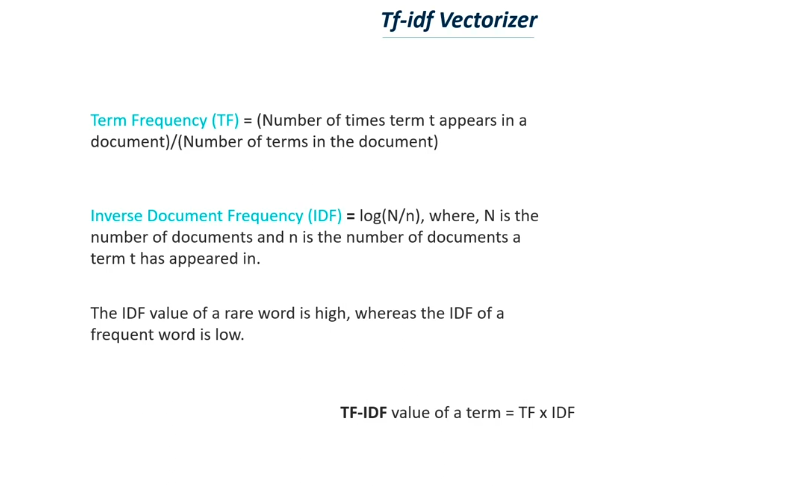

# Numerical Dataset Pre-Processing

In [4]:
# IMPORT the Dependences

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Data collection and Preprocessing

In [5]:
# loading data from csv file to pandas dataframe
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [6]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_data.shape

(768, 9)

In [9]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Separating feature and target

In [10]:
X = diabetes_data.drop(columns='Outcome', axis=1)
Y = diabetes_data['Outcome']

In [11]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Data standardization

In [12]:
scalar = StandardScaler()

In [15]:
standardized_data= scalar.fit_transform(X)

In [16]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [17]:
X = standardized_data

In [18]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


Spliting the datast into training and testing data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)

In [22]:
print(X_train.shape,X_test.shape)

(614, 8) (154, 8)


# Text Data Pre-processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# importing the dependencies
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [76]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
print(stopwords.words('english'))  
# stopwords are words in a paragraph which are repearted lots of time but don't have much meaning

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [78]:
# lload the data to a pandas dataframe
news_data = pd.read_csv('/content/drive/MyDrive/dataset/fake_news_dataset.csv')

In [79]:
# first five rows of dataset
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


0 --> real news

1--> fake news

In [80]:
# checking if a dataset is a balance dataset or not
news_data['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [81]:
news_data.shape

(20800, 5)

In [82]:
# checking for missing value
news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [83]:
# replacing the missing value with null string
news_data = news_data.fillna('')

In [84]:
# lets merge the author name and news title
news_data['content'] = news_data['author']+''+news_data['title']

In [85]:
news_data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [86]:
# separating feature and target
X = news_data.drop(columns = 'label', axis=1)
Y = news_data['label']

In [87]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

### Steming
steming is the processing the reducing a word to its root word.
Stemming is a process in natural language processing (NLP) that involves reducing words to their base or root form. The idea behind stemming is to remove the suffixes (or endings) of words in order to map related words to the same stem, regardless of the tense or plural form they may appear in. This can be useful in many NLP tasks, such as text classification or information retrieval, as it allows words with similar meanings to be treated as the same term.

For example, the stem of the words "jumps," "jumped," and "jumping" is "jump." By stemming these words, they can all be represented by the same term, which makes it easier to identify their common features and classify them together.

There are several algorithms for stemming words in NLP, including the Porter stemmer, Snowball stemmer, and the Lancaster stemmer. These algorithms use different techniques to remove suffixes from words, such as heuristics, rules, and machine learning. The choice of stemmer depends on the task and the desired trade-off between accuracy and computational efficiency.








In [88]:
port_stem = PorterStemmer()

In [89]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content= stemmed_content.lower().split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content


In [90]:
news_data['content'] = news_data['content'].apply(stemming)

In [92]:

print(news_data['content'])

0        darrel lucushous dem aid even see comey letter...
1        daniel j flynnflynn hillari clinton big woman ...
2                consortiumnew comwhi truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoyiranian woman jail fiction unpub...
                               ...                        
20795    jerom hudsonrapp trump poster child white supr...
20796    benjamin hoffmann f l playoff schedul matchup ...
20797    michael j de la merc rachel abramsmaci said re...
20798    alex ansarynato russia hold parallel exercis b...
20799                        david swansonwhat keep f aliv
Name: content, Length: 20800, dtype: object


In [93]:
X = news_data['content'].values
Y = news_data['label'].values

In [94]:
print(X)
print(Y)

['darrel lucushous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynnflynn hillari clinton big woman campu breitbart'
 'consortiumnew comwhi truth might get fire' ...
 'michael j de la merc rachel abramsmaci said receiv takeov approach hudson bay new york time'
 'alex ansarynato russia hold parallel exercis balkan'
 'david swansonwhat keep f aliv']
[1 0 1 ... 0 1 1]


In [95]:
Y.shape

(20800,)

In [96]:
X.shape

(20800,)

In [97]:
# converting the textual data to feature vector
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [98]:
print(X)

  (0, 26340)	0.28088379401596425
  (0, 22724)	0.2552336018069161
  (0, 15019)	0.43006226759639316
  (0, 14555)	0.29177259684200296
  (0, 12782)	0.24619727512767195
  (0, 8022)	0.23133661742488731
  (0, 6273)	0.2839932825877813
  (0, 5969)	0.35488202138141456
  (0, 5006)	0.2472595823572816
  (0, 4211)	0.3625320323150658
  (0, 578)	0.2694167078545385
  (1, 27923)	0.36911845953845024
  (1, 11313)	0.24166773097712638
  (1, 8772)	0.5258635625386451
  (1, 5916)	0.31810058109638056
  (1, 4767)	0.23338756776626793
  (1, 3859)	0.45980466668763476
  (1, 3281)	0.18652439327549428
  (1, 2622)	0.3562953366945267
  (2, 26235)	0.3665032495181434
  (2, 16361)	0.43295215406038445
  (2, 9454)	0.30743020569262086
  (2, 8567)	0.3411947414020896
  (2, 5240)	0.40440534260277944
  (2, 5121)	0.5511414848555652
  :	:
  (20797, 25776)	0.08220218573989037
  (20797, 25319)	0.3119640221826561
  (20797, 22086)	0.24902354987792552
  (20797, 20778)	0.2729578683228216
  (20797, 20493)	0.249994989010826
  (20797, 17505